<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Bibliography" data-toc-modified-id="Bibliography-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Bibliography</a></span></li><li><span><a href="#Minimization-of-a-function-$f(x,y)$-using-the-derivative-==-0" data-toc-modified-id="Minimization-of-a-function-$f(x,y)$-using-the-derivative-==-0-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Minimization of a function $f(x,y)$ using the derivative == 0</a></span></li><li><span><a href="#Minimization-of-a-function-$f(x,-y)$-using-the-Gradient-Descend-Algorithm-(GDA)" data-toc-modified-id="Minimization-of-a-function-$f(x,-y)$-using-the-Gradient-Descend-Algorithm-(GDA)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Minimization of a function $f(x, y)$ using the Gradient Descend Algorithm (GDA)</a></span></li></ul></div>

## Bibliography
1. https://scipy-lectures.org/advanced/mathematical_optimization/

## Minimization of a function $f(x,y)$ using the derivative == 0

Let

$$
f(x,y) = \frac{1}{2}((x-1)^2+2(y-2)^2).
$$

To find $(x^*, y^*)=arg min f(x, y)$ we must solve

$$
\begin{array}{c}
\frac{\partial f(x, y)}{\partial x} = x^* - 1 = 0; x^* = 1 \\
\frac{\partial f(x, y)}{\partial y} = 2 (y^* - 2) = 0; y^* = 2
\end{array}
$$

The minimum value is
$$
f(x^*, y^*) = f(1, 2) = [0,0].
$$

In [1]:
import numpy as np
from scipy.optimize import minimize

def f(x):
    return ((x[0]-1)**2 + 2*((x[1]-2)**2))/2

minimize(f, np.array([0, 0]))

      fun: 4.7409545364449734e-14
 hess_inv: array([[1.00008320e+00, 3.18132301e-04],
       [3.18132301e-04, 5.01216451e-01]])
      jac: array([-5.38552823e-08, -4.11855636e-07])
  message: 'Optimization terminated successfully.'
     nfev: 20
      nit: 4
     njev: 5
   status: 0
  success: True
        x: array([0.99999994, 1.99999979])

## Minimization of a function $f(x, y)$ using the Gradient Descend Algorithm (GDA)
See the example for one dimension.

In [2]:
def gradient_f(x):
    y = np.array([x[0]-1, 2*(x[1]-2)])
    return y

In [24]:
def GDA(min_learning_rate = 1e-3, initial_argmin = np.array([0, 0])):
    learning_rate = 1.0
    argmin = initial_argmin
    iters = 0
    print("{:>6}{:>20}{:>10}{:>20}{:>10}{:>10}".format("iters", "argmin", "f(amin)", "f'(amin)", "rate", "min_rate"))
    while(learning_rate > min_learning_rate):
        iters += 1
        _gradient_f = gradient_f(argmin)
        print(f"{iters:>6}{argmin[0]:>10.4f}{argmin[1]:>10.4f}{f(argmin):>10.4f}{_gradient_f[0]:>10.4f}{_gradient_f[1]:>10.4f}{learning_rate:>10.6f}{min_learning_rate:>10.6}")
        if not np.any(_gradient_f):
            print("minimum found")
            break
        prev_argmin = argmin
        argmin = argmin - learning_rate * _gradient_f
        if f(argmin) >= f(prev_argmin):
            learning_rate /= 2.0
    return argmin, f(argmin)

Text(0.5, 1.0, '((x[0]-1)**2 + 2*((x[1]-2)**2))/2')

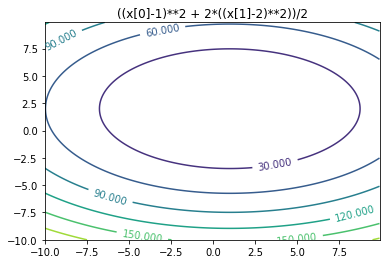

In [30]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-10, 10, 0.1)
y = np.arange(-10, 10, 0.1)
X, Y = np.meshgrid(x, y)
params = np.asarray([X, Y])
Z = f(params)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title("((x[0]-1)**2 + 2*((x[1]-2)**2))/2")

In [26]:
print(GDA())

 iters              argmin   f(amin)            f'(amin)      rate  min_rate
     1    0.0000    0.0000    4.5000   -1.0000   -4.0000  1.000000     0.001
     2    1.0000    4.0000    4.0000    0.0000    4.0000  1.000000     0.001
     3    1.0000    0.0000    4.0000    0.0000   -4.0000  0.500000     0.001
     4    1.0000    2.0000    0.0000    0.0000    0.0000  0.500000     0.001
minimum found
(array([1., 2.]), 0.0)


In [27]:
print(GDA(min_learning_rate = 1e-5, initial_argmin = np.array([10, -10])))

 iters              argmin   f(amin)            f'(amin)      rate  min_rate
     1   10.0000  -10.0000  184.5000    9.0000  -24.0000  1.000000     1e-05
     2    1.0000   14.0000  144.0000    0.0000   24.0000  1.000000     1e-05
     3    1.0000  -10.0000  144.0000    0.0000  -24.0000  0.500000     1e-05
     4    1.0000    2.0000    0.0000    0.0000    0.0000  0.500000     1e-05
minimum found
(array([1., 2.]), 0.0)


In [28]:
print(GDA(min_learning_rate = 1e-2, initial_argmin = np.array([-10, 10])))

 iters              argmin   f(amin)            f'(amin)      rate  min_rate
     1  -10.0000   10.0000  124.5000  -11.0000   16.0000  1.000000      0.01
     2    1.0000   -6.0000   64.0000    0.0000  -16.0000  1.000000      0.01
     3    1.0000   10.0000   64.0000    0.0000   16.0000  0.500000      0.01
     4    1.0000    2.0000    0.0000    0.0000    0.0000  0.500000      0.01
minimum found
(array([1., 2.]), 0.0)


In [29]:
print(GDA(min_learning_rate = 1e-10, initial_argmin = np.array([1000, -1000])))

 iters              argmin   f(amin)            f'(amin)      rate  min_rate
     1 1000.0000-1000.00001503004.5000  999.0000-2004.0000  1.000000     1e-10
     2    1.0000 1004.00001004004.0000    0.0000 2004.0000  1.000000     1e-10
     3    1.0000-1000.00001004004.0000    0.0000-2004.0000  0.500000     1e-10
     4    1.0000    2.0000    0.0000    0.0000    0.0000  0.500000     1e-10
minimum found
(array([1., 2.]), 0.0)


Text(0.5, 1.0, '2 * ( exp(-x**2 - y**2) - exp(-(x - 1)**2 - (y - 1)**2) )')

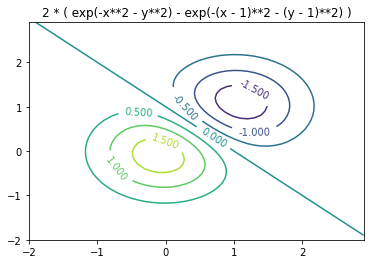

In [35]:
# Example: minimization of f(x, y) = 2 * ( exp(-x**2 - y**2) - exp(-(x - 1)**2 - (y - 1)**2) )
# See https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/contour_demo.html#sphx-glr-gallery-images-contours-and-fields-contour-demo-py
import math
def f(x):
    return 2 * ( np.exp(-x[0]**2 - x[1]**2) - np.exp(-(x[0] - 1)**2 - (x[1] - 1)**2) )

# print(f(np.array([1,2])))

# See https://www.derivative-calculator.net/
def gradient_f(x):
    y = np.array([2*(2*(x[0]-1)*math.exp(-(x[0]-1)**2-(x[1]-1)**2)-2*x[0]*math.exp(-x[0]**2-x[1]**2)),
                  2*(2*(x[1]-1)*math.exp(-(x[1]-1)**2-(x[0]-1)**2)-2*x[1]*math.exp(-x[1]**2-x[0]**2))])
    return y

x = np.arange(-2, 3, 0.1)
y = np.arange(-2, 3, 0.1)
X, Y = np.meshgrid(x, y)
params = np.asarray([X, Y])
Z = f(params)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title("2 * ( exp(-x**2 - y**2) - exp(-(x - 1)**2 - (y - 1)**2) )")

In [36]:
minimize(f, np.array([0, 0]))

      fun: -1.7825542441558009
 hess_inv: array([[ 0.59721366, -0.40278634],
       [-0.40278634,  0.59721366]])
      jac: array([2.27987766e-06, 2.27987766e-06])
  message: 'Optimization terminated successfully.'
     nfev: 44
      nit: 4
     njev: 11
   status: 0
  success: True
        x: array([1.09983976, 1.09983976])

In [37]:
print(GDA())

 iters              argmin   f(amin)            f'(amin)      rate  min_rate
     1    0.0000    0.0000    1.7293   -0.5413   -0.5413  1.000000     0.001
     2    0.5413    0.5413   -0.2001   -2.4096   -2.4096  1.000000     0.001
     3    2.9509    2.9509   -0.0010    0.0039    0.0039  0.500000     0.001
     4    2.9490    2.9490   -0.0010    0.0039    0.0039  0.500000     0.001
     5    2.9470    2.9470   -0.0010    0.0040    0.0040  0.500000     0.001
     6    2.9450    2.9450   -0.0010    0.0040    0.0040  0.500000     0.001
     7    2.9430    2.9430   -0.0011    0.0041    0.0041  0.500000     0.001
     8    2.9410    2.9410   -0.0011    0.0041    0.0041  0.500000     0.001
     9    2.9389    2.9389   -0.0011    0.0042    0.0042  0.500000     0.001
    10    2.9368    2.9368   -0.0011    0.0043    0.0043  0.500000     0.001
    11    2.9347    2.9347   -0.0011    0.0043    0.0043  0.500000     0.001
    12    2.9325    2.9325   -0.0011    0.0044    0.0044  0.500000     0.001

In [40]:
print(GDA(initial_argmin = np.array([10.0,-10.0])))

 iters              argmin   f(amin)            f'(amin)      rate  min_rate
     1   10.0000  -10.0000    0.0000   -0.0000    0.0000  1.000000     0.001
     2   10.0000  -10.0000    0.0000   -0.0000    0.0000  0.500000     0.001
     3   10.0000  -10.0000    0.0000   -0.0000    0.0000  0.250000     0.001
     4   10.0000  -10.0000    0.0000   -0.0000    0.0000  0.125000     0.001
     5   10.0000  -10.0000    0.0000   -0.0000    0.0000  0.062500     0.001
     6   10.0000  -10.0000    0.0000   -0.0000    0.0000  0.031250     0.001
     7   10.0000  -10.0000    0.0000   -0.0000    0.0000  0.015625     0.001
     8   10.0000  -10.0000    0.0000   -0.0000    0.0000  0.007812     0.001
     9   10.0000  -10.0000    0.0000   -0.0000    0.0000  0.003906     0.001
    10   10.0000  -10.0000    0.0000   -0.0000    0.0000  0.001953     0.001
(array([ 10., -10.]), 2.393212996641313e-87)


In [43]:
print(GDA(min_learning_rate = 1e-10, initial_argmin = np.array([2.0,2.0])))

 iters              argmin   f(amin)            f'(amin)      rate  min_rate
     1    2.0000    2.0000   -0.2700    0.5387    0.5387  1.000000     1e-10
     2    1.4613    1.4613   -1.2787    1.1240    1.1240  1.000000     1e-10
     3    0.3374    0.3374    0.7618   -2.1761   -2.1761  0.500000     1e-10
     4    1.4254    1.4254   -1.3583    1.0869    1.0869  0.500000     1e-10
     5    0.8820    0.8820   -1.5230   -1.2037   -1.2037  0.500000     1e-10
     6    1.4838    1.4838   -1.2279    1.1391    1.1391  0.250000     1e-10
     7    1.1990    1.1990   -1.7349    0.4649    0.4649  0.250000     1e-10
     8    1.0828    1.0828   -1.7810   -0.0886   -0.0886  0.250000     1e-10
     9    1.1049    1.1049   -1.7824    0.0260    0.0260  0.250000     1e-10
    10    1.0984    1.0984   -1.7825   -0.0073   -0.0073  0.250000     1e-10
    11    1.1002    1.1002   -1.7826    0.0021    0.0021  0.250000     1e-10
    12    1.0997    1.0997   -1.7826   -0.0006   -0.0006  0.250000     1e-10